In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import pickle

In [2]:
# Load the dataset
file_path = 'C:/Users/sanga/OneDrive/Documents/Algerian_forest_fires_cleaned.csv'
df = pd.read_csv(file_path)

## ***Step 1: Data Cleaning***

In [3]:
# Drop any rows with missing values
df = df.dropna()

In [4]:
# Check for any other anomalies in the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB
None
              day       month    year  Temperature          RH          Ws  \
count  243.000000  243.000000   243

In [15]:
#Handling the erros

df.dropna(inplace=True) 
print(df.isnull().sum())

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [16]:
# Feature Selection and Engineering
# Dropping unnecessary columns

df = df.drop(columns=['day', 'month', 'year', 'Classes', 'Region'])
print(df.head())

   Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5


In [17]:
df.dtypes

Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
dtype: object

In [18]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


##

## ***Step 2: Data Visualization***

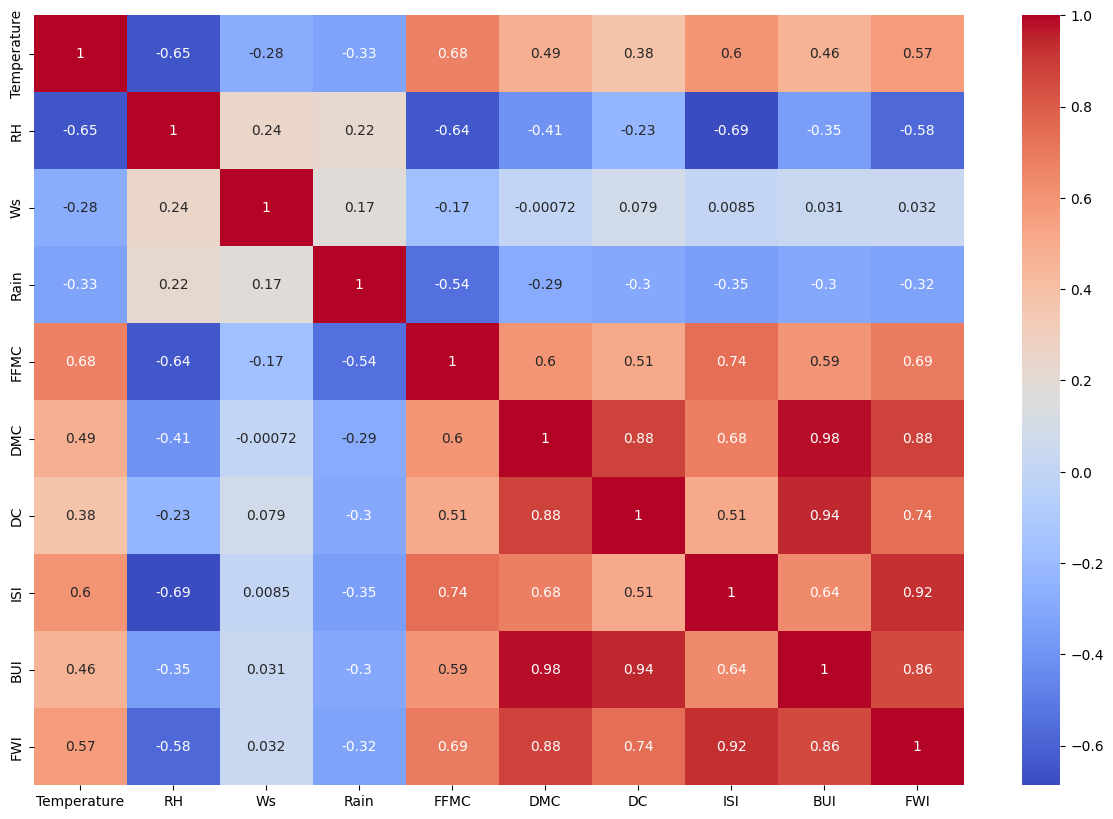

In [19]:
# Heat map
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

This image is a **correlation heatmap**, which shows how different weather and fire-related factors are connected to each other. Each square represents the strength of the relationship between two factors, using numbers that range from -1 to 1:

### Factors Included:
The heatmap seems to include variables related to weather and fire behavior:
- **Temperature**
- **Relative Humidity (RH)**
- **Wind Speed (Ws)**
- **Rain**
- **Fine Fuel Moisture Code (FFMC)**
- **Duff Moisture Code (DMC)**
- **Drought Code (DC)**
- **Initial Spread Index (ISI)**
- **Build-Up Index (BUI)**
- **Fire Weather Index (FWI)**

### Key Insights:

- **Temperature and FFMC (0.68):** There’s a moderately strong link here. As temperature rises, the FFMC value also goes up, suggesting that warmer conditions dry out fine fuels, making them more flammable.
  
- **Temperature and RH (-0.65):** This strong negative relationship means that as temperature increases, humidity decreases, which is expected since warmer air holds less moisture.
  
- **FWI and ISI (0.92):** A very strong positive connection. When the Initial Spread Index (how fast a fire could spread) rises, the Fire Weather Index (which measures overall fire risk) goes up too.
  
- **FWI with DMC (0.88) and DC (0.74):** The Fire Weather Index is closely tied to how much moisture is in the duff (DMC) and how dry the long-term conditions are (DC), showing that these two factors greatly affect fire risk.
  
- **Rain and FFMC (-0.54):** As expected, more rain lowers the FFMC, meaning rain makes fine fuels wetter and less likely to burn.
  
- **RH and ISI (-0.69):** Higher humidity generally slows fire spread, which is why this negative relationship exists.

### Overall:
The heatmap shows how different factors affects fire risk, with the Fire Weather Index (FWI) being the key summary of these conditions. Factors like temperature, moisture levels (FFMC, DMC, DC), and wind speed are all important contributors to fire risk, while rain and humidity act to decrease fire potential.

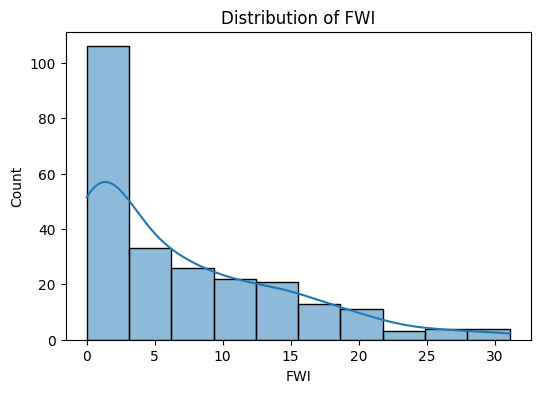

In [20]:
# Visualize the distribution of the target variable (FWI)
plt.figure(figsize=(6,4))
sns.histplot(df['FWI'], kde=True)
plt.title('Distribution of FWI')
plt.show()

##

This Visualization aimed at helping users understand how the values of the "FWI" variable are distributed, 
which can be useful for identifying patterns, trends, or anomalies in the data.

The image is a histogram with a kernel density estimate (KDE) overlay showing the distribution of the **FWI** (likely referring to Fire Weather Index or a similar index). Here's a breakdown of the chart:

- **X-axis (FWI):** Represents the values of the FWI, ranging from 0 to 30.
- **Y-axis (Count):** Indicates the frequency or count of occurrences for each bin of FWI values.
- **Histogram Bars:** Each bar shows how many observations fall into a specific range of FWI values. The highest bar is concentrated around the 0–5 range, indicating that the majority of the FWI values are low.
- **KDE Line (Blue Curve):** A smooth curve is overlaid on top of the histogram. It provides a continuous estimate of the probability density function of the FWI values, showing how the data is distributed more smoothly. It closely follows the shape of the histogram, indicating a skewed distribution.

### Key Observations:
- Most of the FWI values are clustered toward the lower end (0–5).
- The distribution is **right-skewed**, meaning there are fewer instances of higher FWI values.
- There's a long tail extending towards higher FWI values (up to around 30), but the counts of higher values are very low.

This distribution likely indicates that most conditions result in low FWI values, with fewer extreme fire-weather conditions (represented by higher FWI values).


## ***# Step 3: Feature Selection***

In [21]:
# Assume 'FWI' is the target variable (based on Fire Weather Index)
# Separating features (X) and target variable (y)
X = df.drop(columns=['FWI'])
y = df['FWI']

##

## ***Step 4: Split the data into train and test sets***

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##

## ***# Step 5: Model Building***

In [23]:
# Multiple Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
pn_model = LinearRegression()
pn_model.fit(X_poly_train, y_train)

LinearRegression()

In [25]:
# Ridge Regression (Regularization)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [26]:
# Lasso Regression (Regularization)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

##

## ***Step 6: Cross-validation and hyperparameter tuning***

In [27]:
# Cross-validation for each model
cv_score_lr = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2').mean()
cv_score_ridge = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='r2').mean()
cv_score_lasso = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='r2').mean()

C:\Users\sanga\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.677e+01, tolerance: 9.104e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\sanga\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.209e+00, tolerance: 1.013e+00
  model = cd_fast.enet_coordinate_descent(


In [28]:
print(f"Linear Regression CV Score: {cv_score_lr}")
print(f"Ridge Regression CV Score: {cv_score_ridge}")
print(f"Lasso Regression CV Score: {cv_score_lasso}")

Linear Regression CV Score: 0.9549936816949914
Ridge Regression CV Score: 0.9550602462259841
Lasso Regression CV Score: 0.9558322532049471


In [29]:
# Hyperparameter tuning for Ridge and Lasso using GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5)
ridge_cv.fit(X_train, y_train)
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_cv.fit(X_train, y_train)

C:\Users\sanga\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.144e+02, tolerance: 9.104e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\sanga\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.101e+02, tolerance: 9.264e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\sanga\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]})

In [30]:
print(f"Best Ridge Alpha: {ridge_cv.best_params_}")
print(f"Best Lasso Alpha: {lasso_cv.best_params_}")

Best Ridge Alpha: {'alpha': 100}
Best Lasso Alpha: {'alpha': 0.1}


##

## ***Step 7: Evaluate model performance on test set***

In [31]:
y_pred_lr = lr_model.predict(X_test)
y_pred_pn = pn_model.predict(X_poly_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

In [32]:
print(f"Linear Regression R2: {r2_score(y_test, y_pred_lr)}, MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"Polynomial Regression R2: {r2_score(y_test, y_pred_pn)}, MSE: {mean_squared_error(y_test, y_pred_pn)}")
print(f"Ridge Regression R2: {r2_score(y_test, y_pred_ridge)}, MSE: {mean_squared_error(y_test, y_pred_ridge)}")
print(f"Lasso Regression R2: {r2_score(y_test, y_pred_lasso)}, MSE: {mean_squared_error(y_test, y_pred_lasso)}")

Linear Regression R2: 0.9882726857720828, MSE: 0.355436382577646
Polynomial Regression R2: 0.9909308700631476, MSE: 0.2748710126831803
Ridge Regression R2: 0.9881706175731134, MSE: 0.35852990857284317
Lasso Regression R2: 0.9860964738045465, MSE: 0.4213939321435952


##

## ***Step 8: Save the models as pickle files***

In [33]:
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

In [34]:
with open('polynomial_model.pkl', 'wb') as f:
    pickle.dump(pn_model, f)

In [35]:
with open('ridge_model.pkl', 'wb') as f:
    pickle.dump(ridge_model, f)

In [36]:
with open('lasso_model.pkl', 'wb') as f:
    pickle.dump(lasso_model, f)

##

## ***Step 9: Testing on unseen data***

In [112]:
# Sample Unseen Data
import pandas as pd

# Create a sample DataFrame for unseen data
data = {
    'Temperature': [4, 3, 5],
    'RH': [1.1, 1.4, 1.2],
    'Ws': [10, 12, 11],
    'Rain': [0,0,0],
    'FFMC': [20, 15, 30],   # Replace these with actual feature names and values
    'DMC': [0.5, 1.2, 0.8],
    'DC': [0.3, 0.7, 0.6],
    'ISI': [7, 6, 5],
    'BUI': [0, 1, 1],
}

In [113]:
# Create DataFrame
unseen_df = pd.DataFrame(data)

In [114]:
# Display the unseen DataFrame
print("Sample Unseen Data:")
print(unseen_df)

Sample Unseen Data:
   Temperature   RH  Ws  Rain  FFMC  DMC   DC  ISI  BUI
0            4  1.1  10     0    20  0.5  0.3    7    0
1            3  1.4  12     0    15  1.2  0.7    6    1
2            5  1.2  11     0    30  0.8  0.6    5    1


In [115]:
# Load the saved models
with open('linear_model.pkl', 'rb') as f:
    lr_model = pickle.load(f)

In [116]:
with open('polynomial_model.pkl', 'rb') as f:
    pn_model = pickle.load(f)

In [117]:
with open('ridge_model.pkl', 'rb') as f:
    ridge_model = pickle.load(f)

In [118]:
with open('lasso_model.pkl', 'rb') as f:
    lasso_model = pickle.load(f)

In [128]:
# Step 1: Scale the data
from sklearn.preprocessing import StandardScaler

In [129]:
# Create and fit scaler on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [130]:
# Now, fit the polynomial regression model on the scaled data
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train_scaled)

In [131]:
# Fit the polynomial regression model
pn_model = LinearRegression()
pn_model.fit(X_poly_train, y_train)

LinearRegression()

In [132]:
# Step 2: Transform and scale the unseen data
unseen_df_scaled = scaler.transform(unseen_df)  # Scale the unseen data
unseen_poly_scaled = poly.transform(unseen_df_scaled)  # Create polynomial features


##

## ***Predictions on unseen data***

In [135]:
# Predictions
pred_lr = lr_model.predict(unseen_df)
pred_pn = pn_model.predict(unseen_poly_scaled)
pred_ridge = ridge_model.predict(unseen_df)
pred_lasso = lasso_model.predict(unseen_df)

In [136]:
# Output predictions
print("Predictions on Unseen Data:")
print("Linear Regression Prediction:", pred_lr)
print("Polynomial Regression Prediction:", pred_pn)
print("Ridge Regression Prediction:", pred_ridge)
print("Lasso Regression Prediction:", pred_lasso)

Predictions on Unseen Data:
Linear Regression Prediction: [9.52442783 8.7793206  6.79710516]
Polynomial Regression Prediction: [-28.33257429 -25.45547566 -13.58033333]
Ridge Regression Prediction: [9.51467574 8.7692486  6.78943804]
Lasso Regression Prediction: [8.69136105 7.96375022 6.02822648]
